# Required Installments For Level-2

In [2]:
!pip install pandas numpy matplotlib scikit-learn
!pip install folium

# Required Imports For Level-2

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
from IPython.display import IFrame
import folium as fo
import random 
import seaborn as sns
print("Successfully Imported")

Successfully Imported


# Task 1 : Restaurant Rating

### Analyze the distribution of aggregate ratings and determine the most common rating range

In [9]:
def ratings_analysis(data):
  
  range_of_ratings = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
  frequency_distribution = {}
  for start, end in range_of_ratings:
    frequency_distribution[(start, end)] = len(data[(data['Aggregate rating'] >= start) & (data['Aggregate rating'] < end)])
  most_common_rating_range = max(frequency_distribution, key=frequency_distribution.get)
  most_common_range_frequency = frequency_distribution[most_common_rating_range]
  return most_common_rating_range, most_common_range_frequency
    
data = pd.read_csv("E:\\congnifyz_internship\\Dataset .csv")

most_common_rating_range, most_common_range_frequency = ratings_analysis(data)
print("Most common rating range:->", most_common_rating_range)
print("Most common rating range Frequency:->", most_common_range_frequency)

Most common rating range:-> (3, 4)
Most common rating range Frequency:-> 4590


### Calculate the average number of votes received by restaurants.

In [5]:
avg_votes = data['Votes'].mean()
print("Average number of votes recived by restaurants:->", avg_votes)

Average number of votes recived by restaurants:-> 156.909747670401


# Task 2 : Cuisine Combination

### Identify the most common combinations of cuisines in the dataset.

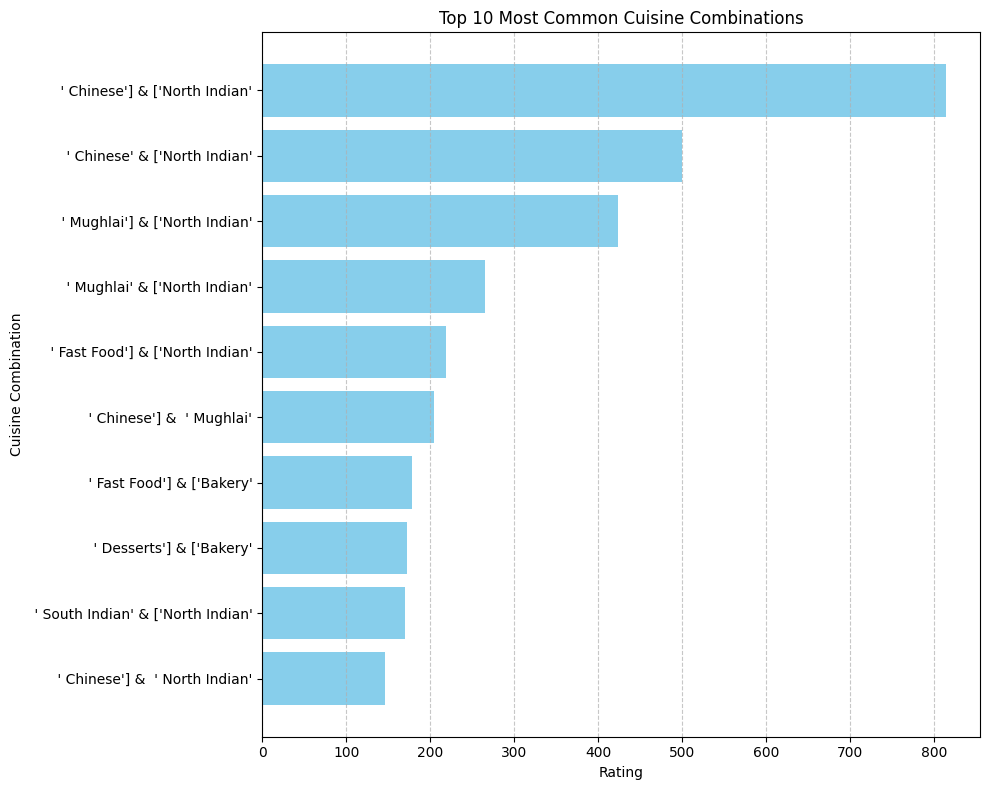

In [27]:
data['Cuisines'] = data['Cuisines'].astype(str).str.lower().str.split(',')
combi_list = []
for cuisines in data['Cuisines']:
    if isinstance(cuisines, list):  
        combi_list.extend(combinations(sorted(set(cuisines)), 2))
combi_counts = Counter(combi_list)
combi_df = pd.DataFrame(combi_counts.items(), columns=['Combination', 'Count'])
combi_df = combi_df.sort_values(by='Count', ascending=False)
top_combinations = combi_df.head(10)
labels = [' & '.join(comb).title() for comb in top_combinations['Combination']]
values = top_combinations['Count']

plt.figure(figsize=(10, 8))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Rating")
plt.ylabel("Cuisine Combination")
plt.title("Top 10 Most Common Cuisine Combinations")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Determine if certain cuisine combinations tend to have higher ratings.

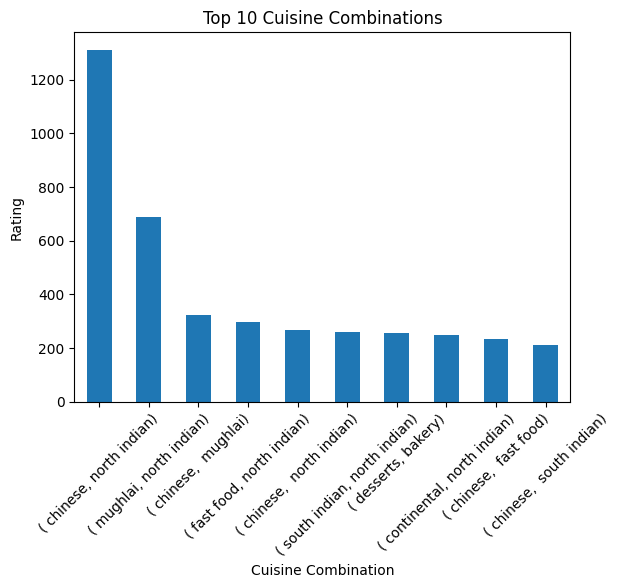

In [7]:
top_combi = combi_df.head(10)
top_combi.plot(kind='bar', x='Combination', y='Count', legend=False)
plt.title('Top 10 Cuisine Combinations')
plt.xlabel('Cuisine Combination')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Task 3 : Geographic Analysis


### Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [18]:
m = fo.Map(location=[20.0, 0.0], zoom_start=2) 
for index, row in data.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    cuisine = row['Cuisines']
    fo.Marker(
        location=[lat, lon],
        popup=f'{cuisine} Restaurant',
        icon=fo.Icon(color='red', icon='info-sign')
    ).add_to(m)

IFrame('restaurant_locations_map.html', width=800, height=600)

### Identify any patterns or clusters of restaurants in specific areas.

In [7]:
coordinates = data[['Latitude', 'Longitude']].values
db = DBSCAN(eps=0.5, min_samples=5, metric='haversine') 
data['Cluster'] = db.fit_predict(np.radians(coordinates))  
m = fo.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)
def random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
for index, row in data.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    cluster_id = row['Cluster']
    if cluster_id == -1:
        color = 'gray'
    else:
        color = random_color() 
    fo.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Cluster {cluster_id} - {row['Cuisines']} Cuisine"
    ).add_to(m)

IFrame('restaurant_clusters_map_with_random_colors.html', width=600, height=400)

# Task 4 : Restaurant Chains

### Identify if there are any restaurant chains present in the dataset.

In [14]:
data.columns = data.columns.str.strip()
data['Restaurant Name'] = data['Restaurant Name'].str.strip()
res_counts = data['Restaurant Name'].value_counts()
chains = res_counts[res_counts > 1]
print("\nThese are the restaurant chains:->")
print(chains)


These are the restaurant chains:->
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
San Carlo            2
Gymkhana             2
Dishoom              2
Timboo Cafe          2
D�_vero��lu          2
Name: count, Length: 734, dtype: int64


### Analyze the ratings and popularity of different restaurant chains.

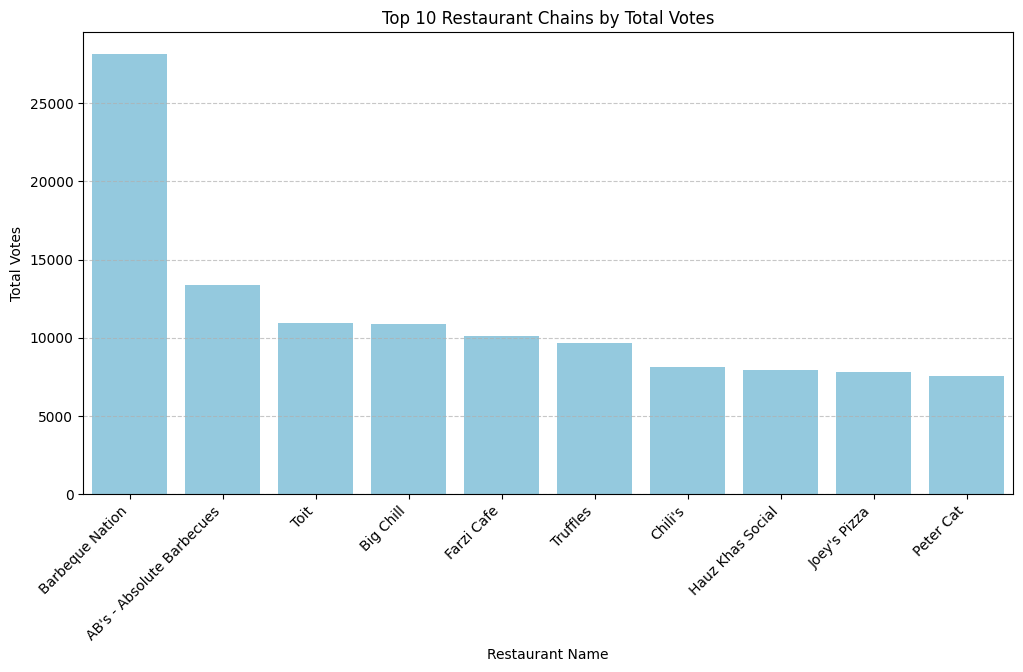

In [22]:
chain_analysis = data.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant Name': 'count'  
}).rename(columns={'Restaurant Name': 'Outlets'}).reset_index()
chain_analysis = chain_analysis.sort_values(by=['Votes', 'Aggregate rating'], ascending=[False, False])
top_chains = chain_analysis.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_chains, x='Restaurant Name', y='Votes', color='skyblue')  
plt.title("Top 10 Restaurant Chains by Total Votes")
plt.xlabel("Restaurant Name")
plt.ylabel("Total Votes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

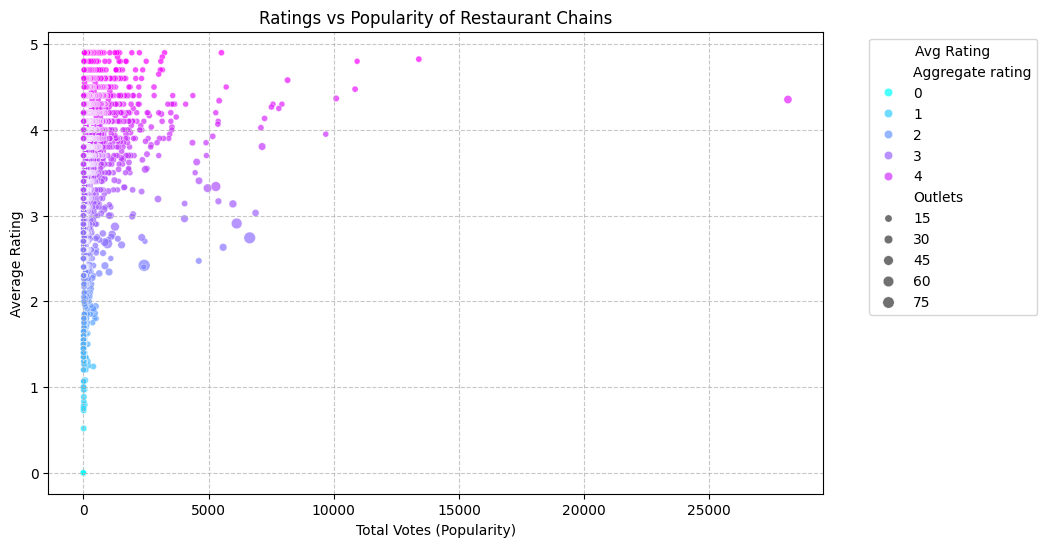

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=chain_analysis, 
    x='Votes', 
    y='Aggregate rating', 
    size='Outlets', 
    hue='Aggregate rating', 
    palette='cool', 
    alpha=0.7
)
plt.title("Ratings vs Popularity of Restaurant Chains")
plt.xlabel("Total Votes (Popularity)")
plt.ylabel("Average Rating")
plt.legend(title="Avg Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()